# CCA testing on Synthetic data

###### Artificial dataset description:

Create 2 artificial datasets A and B to test CCA on temporal data. 
A and B have 2 shared components, thus CCA should ideally find only 2 correlated components.

A and B: 1000 samples x 2 sin waves. 
Transpose each and project to size:
A: 1000 samples (timepoints) x 100 features; B: 1000 samples x 200 featues. 
Use random matrix or matrix of ones for that. 
Add noise to each.


mak eone experimetn where instead of projecting the signals, I have noise fo rthe rest!

## Experiments

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_cca_components(results):
    means = [results[f'Canonical correlation {i+1}']['Mean'] for i in range(len(results))]
    std_devs = [results[f'Canonical correlation {i+1}']['Std Dev'] for i in range(len(results))]

    fig, ax = plt.subplots()
    ax.errorbar(range(1, len(means)+1), means, yerr=std_devs, fmt='o')
    ax.set_xlabel('Canonical component')
    ax.set_ylabel('Cannonical correlation')
    plt.show()



### Simple

low dim | low noise | 

```
n_timepoints = 1000
n_features_a = 100
n_features_b = 220
n_shared_components = 2
shared_freq = [5, 12]
shared_phase = [np.pi, np.pi/2]
n_independent_components_a = None
n_independent_components_b = None
noise_level = 0.1

cca_components = 6 # are latent dimentions tunable? 
cca = rCCA(latent_dimensions=cca_components)
c1 = [0.5] # [0.1, 0.3, 0.7, 0.9]
c2 = [0.5] # [0.1, 0.3, 0.7, 0.9]
param_grid = {'c': [c1, c2]} 
cv = 3

verbosity = True

plot_reconstructed_signal = True
if plot_reconstructed_signal:
    components_to_restore = 2
    comment = f"test_scaling_matrix_random"
    name = f'SignalA_shared{n_shared_components}_independent{n_independent_components_a}_{n_independent_components_b}_noise{noise_level}_timepoints{n_timepoints}_{comment}'

```

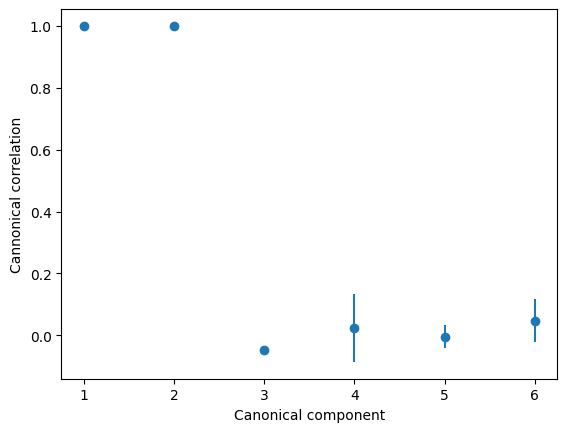

In [40]:
results = {'Canonical correlation 1': {'Mean': 0.9999797788009557, 'Std Dev': 2.1672075742961713e-06}, 'Canonical correlation 2': {'Mean': 0.9998391488898051, 'Std Dev': 1.2775326166985773e-05}, 'Canonical correlation 3': {'Mean': -0.0462296340248345, 'Std Dev': 0.011677154464938713}, 'Canonical correlation 4': {'Mean': 0.02294952956789568, 'Std Dev': 0.10912522725481616}, 'Canonical correlation 5': {'Mean': -0.004406395573189339, 'Std Dev': 0.03833631337569535}, 'Canonical correlation 6': {'Mean': 0.047114172186800994, 'Std Dev': 0.07026641117421552}}
plot_cca_components(results)

![Alt text](../plots/synthetic/simple_case/SignalA_shared2_independentNone_None_noise0.1_timepoints1000_simple.png)

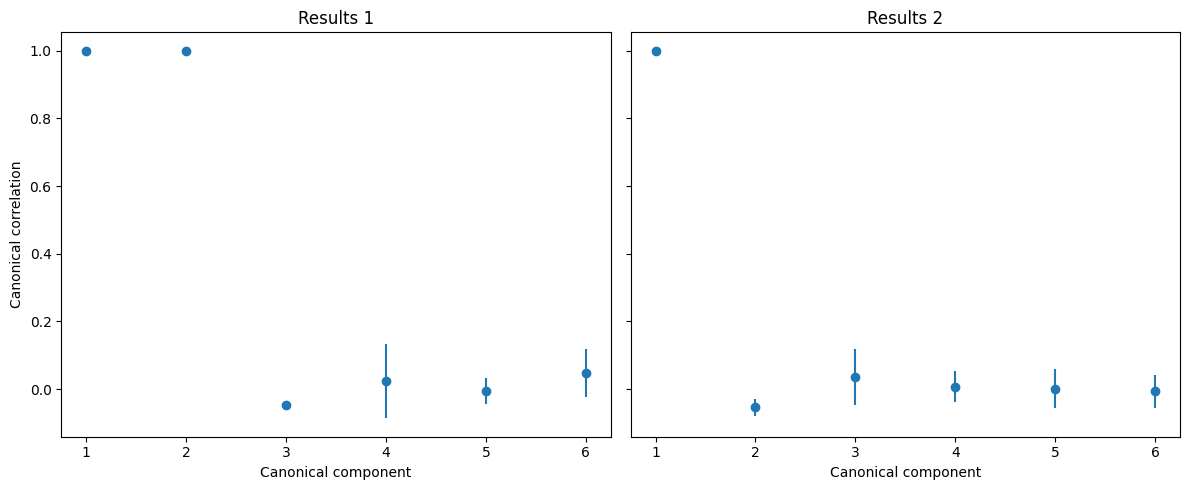

In [41]:
# try random vs ones matrix: 

# random:
results1 = {'Canonical correlation 1': {'Mean': 0.9999797788009557, 'Std Dev': 2.1672075742961713e-06}, 'Canonical correlation 2': {'Mean': 0.9998391488898051, 'Std Dev': 1.2775326166985773e-05}, 'Canonical correlation 3': {'Mean': -0.0462296340248345, 'Std Dev': 0.011677154464938713}, 'Canonical correlation 4': {'Mean': 0.02294952956789568, 'Std Dev': 0.10912522725481616}, 'Canonical correlation 5': {'Mean': -0.004406395573189339, 'Std Dev': 0.03833631337569535}, 'Canonical correlation 6': {'Mean': 0.047114172186800994, 'Std Dev': 0.07026641117421552}}
results2 = {'Canonical correlation 1': {'Mean': 0.9999943494680001, 'Std Dev': 6.281173033872001e-07}, 'Canonical correlation 2': {'Mean': -0.053349252330070804, 'Std Dev': 0.025552436164225912}, 'Canonical correlation 3': {'Mean': 0.03524505451449992, 'Std Dev': 0.08290562551237188}, 'Canonical correlation 4': {'Mean': 0.007747493497656641, 'Std Dev': 0.04464091810426333}, 'Canonical correlation 5': {'Mean': 0.001633779509309484, 'Std Dev': 0.05655028180120764}, 'Canonical correlation 6': {'Mean': -0.006061719238232529, 'Std Dev': 0.049227689173896236}}


means1 = [results1[f'Canonical correlation {i+1}']['Mean'] for i in range(len(results1))]
std_devs1 = [results1[f'Canonical correlation {i+1}']['Std Dev'] for i in range(len(results1))]
means2 = [results2[f'Canonical correlation {i+1}']['Mean'] for i in range(len(results2))]
std_devs2 = [results2[f'Canonical correlation {i+1}']['Std Dev'] for i in range(len(results2))]

fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
# Plot results1
axs[0].errorbar(range(1, len(means1) + 1), means1, yerr=std_devs1, fmt='o')
axs[0].set_title('Results 1')
axs[0].set_xlabel('Canonical component')
axs[0].set_ylabel('Canonical correlation')

# Plot results2
axs[1].errorbar(range(1, len(means2) + 1), means2, yerr=std_devs2, fmt='o')
axs[1].set_title('Results 2')
axs[1].set_xlabel('Canonical component')

plt.tight_layout()
plt.show()


![Alt text](../plots/synthetic/simple_case/SignalA_shared2_independentNone_None_noise0.1_timepoints1000_test_scaling_matrix_random.png)
![Alt text](../plots/synthetic/simple_case/SignalA_shared2_independentNone_None_noise0.1_timepoints1000_test_scaling_matrix_ones.png)

Individual shared components: 

![Alt text](../plots/synthetic/simple_case/shared_components.png)

Separately restored components and their sum
![Alt text](../plots/simple_case/SignalA_shared2_independentNone_None_noise0.1_timepoints1000_simple_restored1_2.png)

In [ ]:
# how about weights - not much info?

### High noise

low dim | high noise, many independent components

```
n_timepoints = 100000
n_features_a = 100
n_features_b = 220
n_shared_components = 2
shared_freq = [5, 12]
shared_phase = [np.pi, np.pi/2]
n_independent_components_a = 12
n_independent_components_b = 8
noise_level = 1

cca_components = 20 # are latent dimentions tunable? 
cca = rCCA(latent_dimensions=cca_components)
c1 = [0.5] # [0.1, 0.3, 0.7, 0.9]
c2 = [0.5] # [0.1, 0.3, 0.7, 0.9]
param_grid = {'c': [c1, c2]} 
cv = 3

verbosity = True

plot_reconstructed_signal = True
if plot_reconstructed_signal:
    components_to_restore = 2
```

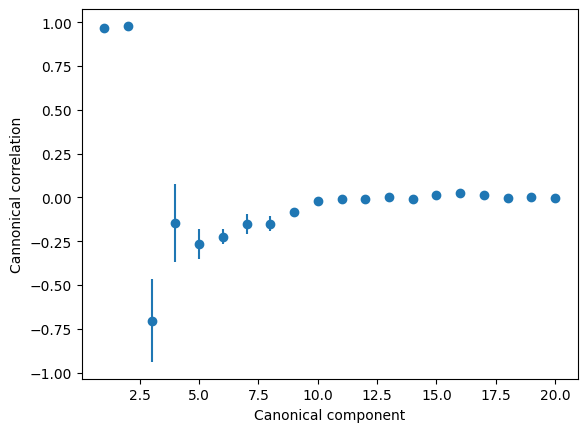

In [3]:
results = {'Canonical correlation 1': {'Mean': 0.9664489649923883, 'Std Dev': 0.008435684723310344}, 'Canonical correlation 2': {'Mean': 0.9764177585808185, 'Std Dev': 0.0024312947199086198}, 'Canonical correlation 3': {'Mean': -0.703050034608584, 'Std Dev': 0.2360238765823253}, 'Canonical correlation 4': {'Mean': -0.14770658744363135, 'Std Dev': 0.2223635039395989}, 'Canonical correlation 5': {'Mean': -0.264094741377396, 'Std Dev': 0.08533579958899228}, 'Canonical correlation 6': {'Mean': -0.2245953886990218, 'Std Dev': 0.04385945654337751}, 'Canonical correlation 7': {'Mean': -0.14999955037579252, 'Std Dev': 0.05712796484103025}, 'Canonical correlation 8': {'Mean': -0.14988772400369976, 'Std Dev': 0.041680600510693604}, 'Canonical correlation 9': {'Mean': -0.08277629794218498, 'Std Dev': 0.02107585188137053}, 'Canonical correlation 10': {'Mean': -0.020741829761513886, 'Std Dev': 0.018282556810470533}, 'Canonical correlation 11': {'Mean': -0.011178030851714572, 'Std Dev': 0.010370661539833194}, 'Canonical correlation 12': {'Mean': -0.007096741227132865, 'Std Dev': 0.0028374849897684065}, 'Canonical correlation 13': {'Mean': 0.0036891415627148274, 'Std Dev': 0.018365916140274118}, 'Canonical correlation 14': {'Mean': -0.007025707598205968, 'Std Dev': 0.005031049150240627}, 'Canonical correlation 15': {'Mean': 0.01607527446277855, 'Std Dev': 0.007667500676063144}, 'Canonical correlation 16': {'Mean': 0.026822027974204, 'Std Dev': 0.013750408987841953}, 'Canonical correlation 17': {'Mean': 0.015112436379153238, 'Std Dev': 0.015327315253063585}, 'Canonical correlation 18': {'Mean': -0.0024859473846152746, 'Std Dev': 0.007714717029521051}, 'Canonical correlation 19': {'Mean': 0.003201485753447504, 'Std Dev': 0.0073959200199086965}, 'Canonical correlation 20': {'Mean': -0.0019249173473691226, 'Std Dev': 0.007010973370237826}}

plot_cca_components(results)

In [ ]:
# could it still be due to similar frq/phase in signals?
# try out by adding one specifically? - completely same and same freq but differnt phase 

Many independent components

2/20 components restored

![Alt text](../plots/synthetic/high_noise/SignalA_shared2_independent12_8_noise1_timepoints100000_restored2.png)

Many independent components

6/20 components restored

![Alt text](../plots/synthetic/high_noise/SignalA_shared2_independent12_8_noise1_timepoints100000_restored6.png)

**Very high noise:**


```
n_timepoints = 10000
n_features_a = 100
n_features_b = 220
n_shared_components = 2
shared_freq = [5, 12]
shared_phase = [np.pi, np.pi/2]
n_independent_components_a = 3
n_independent_components_b = 1
noise_level = 6

cca_components = 20 # are latent dimentions tunable? 
cca = rCCA(latent_dimensions=cca_components)
c1 = [0.5] # [0.1, 0.3, 0.7, 0.9]
c2 = [0.5] # [0.1, 0.3, 0.7, 0.9]
param_grid = {'c': [c1, c2]} 
cv = 3

verbosity = True

plot_reconstructed_signal = True
if plot_reconstructed_signal:
    components_to_restore = 2
```

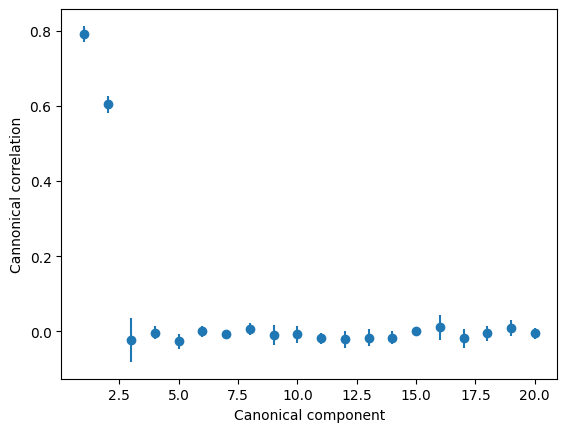

In [6]:
results = {'Canonical correlation 1': {'Mean': 0.7914710038664016, 'Std Dev': 0.02139089004577234}, 'Canonical correlation 2': {'Mean': 0.6047348424801676, 'Std Dev': 0.02240552722434965}, 'Canonical correlation 3': {'Mean': -0.022546526330260046, 'Std Dev': 0.05853642284620612}, 'Canonical correlation 4': {'Mean': -0.002853278697511949, 'Std Dev': 0.016831225115041946}, 'Canonical correlation 5': {'Mean': -0.02625048392526836, 'Std Dev': 0.019715065277987845}, 'Canonical correlation 6': {'Mean': 0.00021549962822773987, 'Std Dev': 0.015181762543053699}, 'Canonical correlation 7': {'Mean': -0.005930299563682478, 'Std Dev': 0.005543397806550785}, 'Canonical correlation 8': {'Mean': 0.006249163034132321, 'Std Dev': 0.015483542615777897}, 'Canonical correlation 9': {'Mean': -0.008704969721490688, 'Std Dev': 0.0268076272340698}, 'Canonical correlation 10': {'Mean': -0.007639060438919569, 'Std Dev': 0.022570257832755014}, 'Canonical correlation 11': {'Mean': -0.0183390205867456, 'Std Dev': 0.014014575513862584}, 'Canonical correlation 12': {'Mean': -0.021363912445100462, 'Std Dev': 0.023351520763434712}, 'Canonical correlation 13': {'Mean': -0.016531010875308366, 'Std Dev': 0.023439804410052167}, 'Canonical correlation 14': {'Mean': -0.016876114309342355, 'Std Dev': 0.016801343647583993}, 'Canonical correlation 15': {'Mean': 0.0016645147174581467, 'Std Dev': 0.009249805899151219}, 'Canonical correlation 16': {'Mean': 0.011328744721059963, 'Std Dev': 0.03300305345475798}, 'Canonical correlation 17': {'Mean': -0.018687306459686324, 'Std Dev': 0.024620197998939764}, 'Canonical correlation 18': {'Mean': -0.005381316456747999, 'Std Dev': 0.020821619777479768}, 'Canonical correlation 19': {'Mean': 0.009313691852779808, 'Std Dev': 0.021583206675938195}, 'Canonical correlation 20': {'Mean': -0.004773986499934149, 'Std Dev': 0.014548192345526319}}

plot_cca_components(results) # had negative but then ensured no same freq and phase and fixed.

High noise

![Alt text](../plots/synthetic/high_noise/SignalA_shared2_independent3_1_noise6_timepoints10000_.png)

### High dim

high dim | mid noise


```
n_timepoints = 1000
n_features_a = 1200
n_features_b = 2200
n_shared_components = 2
shared_freq = [5, 12]
shared_phase = [np.pi, np.pi/2]
n_independent_components_a = None
n_independent_components_b = None
noise_level = 0.7

cca_components = 10 # are latent dimentions tunable? 
cca = rCCA(latent_dimensions=cca_components)
c1 = [0.5] # [0.1, 0.3, 0.7, 0.9]
c2 = [0.5] # [0.1, 0.3, 0.7, 0.9]
param_grid = {'c': [c1, c2]} 
cv = 3

verbosity = True

plot_reconstructed_signal = True
if plot_reconstructed_signal:
    components_to_restore = 2
```

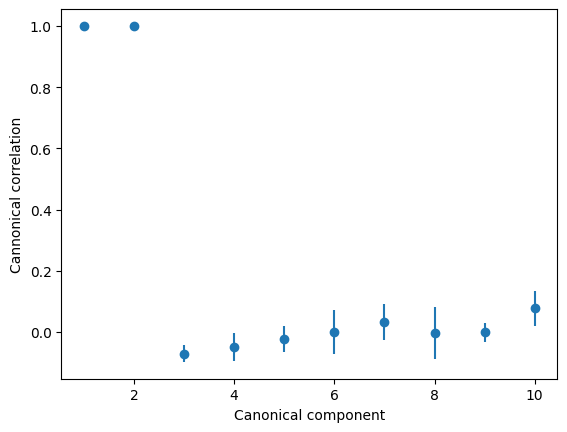

In [6]:
results = {'Canonical correlation 1': {'Mean': 0.9999047614219195, 'Std Dev': 8.485558580001298e-06}, 'Canonical correlation 2': {'Mean': 0.9993052899347934, 'Std Dev': 6.515414703962296e-05}, 'Canonical correlation 3': {'Mean': -0.06988585494508859, 'Std Dev': 0.02747194989821125}, 'Canonical correlation 4': {'Mean': -0.04937641574659124, 'Std Dev': 0.04541324057862159}, 'Canonical correlation 5': {'Mean': -0.023020811670009515, 'Std Dev': 0.04317840505938817}, 'Canonical correlation 6': {'Mean': 0.0007415152577078144, 'Std Dev': 0.07183348482619967}, 'Canonical correlation 7': {'Mean': 0.03245019351786681, 'Std Dev': 0.05958259835277022}, 'Canonical correlation 8': {'Mean': -0.0018639324491610868, 'Std Dev': 0.08480549488078995}, 'Canonical correlation 9': {'Mean': -0.0007131797311283588, 'Std Dev': 0.03168186543696481}, 'Canonical correlation 10': {'Mean': 0.07741663730619185, 'Std Dev': 0.0560780363125273}}

plot_cca_components(results)

![Alt text](../plots/synthetic/SignalA_shared2_independentNone_None_noise0.7_timepoints1000_highDim.png)


### Optimised vs non-optimised?

In [7]:
# can i tune components???

```
n_timepoints = 1000
n_features_a = 3200
n_features_b = 2200
n_shared_components = 2
shared_freq = [5, 12]
shared_phase = [np.pi, np.pi/2]
n_independent_components_a = 3
n_independent_components_b = 3
noise_level = 1

cca_components = 10 # are latent dimentions tunable? 
cca = rCCA(latent_dimensions=cca_components)
cv = None

verbosity = True

plot_reconstructed_signal = True
if plot_reconstructed_signal:
    components_to_restore = 2
```

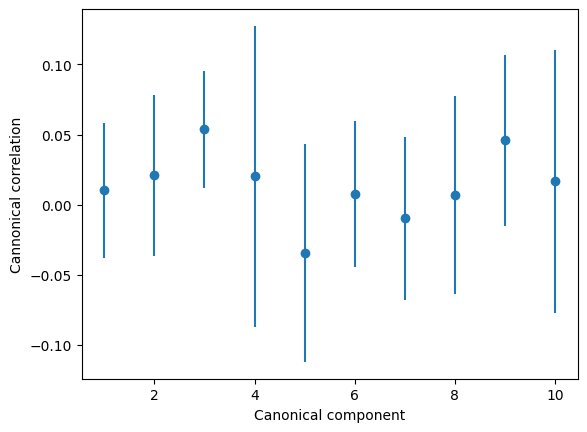

In [7]:
results = {'Canonical correlation 1': {'Mean': 0.010191448140586867, 'Std Dev': 0.04794731691999785}, 'Canonical correlation 2': {'Mean': 0.02090842733515081, 'Std Dev': 0.057359984368879506}, 'Canonical correlation 3': {'Mean': 0.05369757108460892, 'Std Dev': 0.04161437013490855}, 'Canonical correlation 4': {'Mean': 0.020155932115479606, 'Std Dev': 0.10728331115035936}, 'Canonical correlation 5': {'Mean': -0.03464622577043932, 'Std Dev': 0.07753548877795459}, 'Canonical correlation 6': {'Mean': 0.007276534431373607, 'Std Dev': 0.052070639908239354}, 'Canonical correlation 7': {'Mean': -0.009898922593792292, 'Std Dev': 0.05779614014185215}, 'Canonical correlation 8': {'Mean': 0.006798255779604925, 'Std Dev': 0.07039090546985274}, 'Canonical correlation 9': {'Mean': 0.045865866003198405, 'Std Dev': 0.06083167957368476}, 'Canonical correlation 10': {'Mean': 0.01676822846581873, 'Std Dev': 0.09382731967561438}}

plot_cca_components(results)

{'accept_sparse': ['csc', 'csr'], 'c': [0, 0], 'copy_data': True, 'eps': 1e-06, 'latent_dimensions': 10, 'pca': True, 'random_state': None}

![Alt text](../plots/synthetic/regularization/SignalA_shared2_independent3_3_noise1_timepoints1000_not_regularized.png)

```
n_timepoints = 1000
n_features_a = 3200
n_features_b = 2200
n_shared_components = 2
shared_freq = [5, 12]
shared_phase = [np.pi, np.pi/2]
n_independent_components_a = 3
n_independent_components_b = 3
noise_level = 1

cca_components = 10 # are latent dimentions tunable? 
cca = rCCA(latent_dimensions=cca_components)
c1 = [0.1, 0.3, 0.7, 0.9]
c2 = [0.1, 0.3, 0.7, 0.9]
param_grid = {'c': [c1, c2]} 
cv = 3

verbosity = True

plot_reconstructed_signal = True
if plot_reconstructed_signal:
    components_to_restore = 2
```

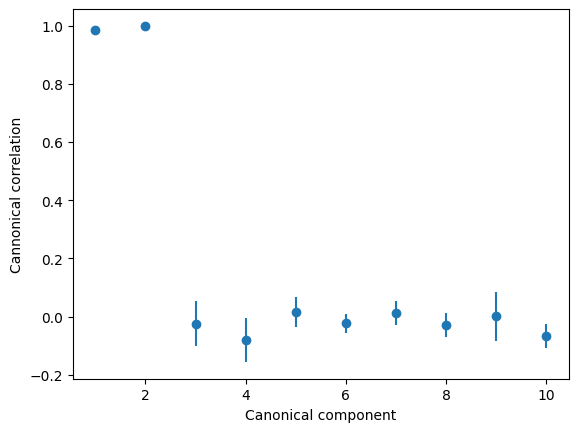

In [8]:
results = {'Canonical correlation 1': {'Mean': 0.985511274306155, 'Std Dev': 0.0062576550957656905}, 'Canonical correlation 2': {'Mean': 0.9990820529701576, 'Std Dev': 0.0001425728281308263}, 'Canonical correlation 3': {'Mean': -0.024426385767745074, 'Std Dev': 0.07651314080761781}, 'Canonical correlation 4': {'Mean': -0.08001668528557382, 'Std Dev': 0.07609836041843229}, 'Canonical correlation 5': {'Mean': 0.014521494573995422, 'Std Dev': 0.05133601445523659}, 'Canonical correlation 6': {'Mean': -0.023375310228284565, 'Std Dev': 0.033394708912557976}, 'Canonical correlation 7': {'Mean': 0.0128206995545419, 'Std Dev': 0.041469200434275155}, 'Canonical correlation 8': {'Mean': -0.030661196085323555, 'Std Dev': 0.04123091672692543}, 'Canonical correlation 9': {'Mean': 0.0007619499449802696, 'Std Dev': 0.08477669613820225}, 'Canonical correlation 10': {'Mean': -0.06776854042197898, 'Std Dev': 0.04039982242750078}}

plot_cca_components(results)

{'accept_sparse': ['csc', 'csr'], 'c': [0.1, 0.9], 'copy_data': True, 'eps': 1e-06, 'latent_dimensions': 10, 'pca': True, 'random_state': None}

![Alt text](../plots/synthetic/regularization/SignalA_shared2_independent3_3_noise1_timepoints1000_regularized.png)

*Note: regularization is 0.9 for both c1 and c2*

### ~~kernel CCA | non linear data~~

## Notes

Other todos:

- baysian optimization of c (regularization)
- different cca
- bigger dimentionality than samples
- non- linear


**Scaling matrix of ones vs random:**

Ones: all features in signal matrix are the same.

Random: feature in signal matrix are different. Each feature (all points in the feature) is scaled by a random number between 0 and 1 - thus signal smaller.

*Important: if scaling matrix of ones is used CCA only finds one component?!*

In [ ]:
# use weights? 
# reconstruct one? - from weights? 
# figure out what going on with negative 

In [ ]:
# % plt unreconstructed signal X_transformed? - just projection
# % reconstruct from only one component and compare to reconstructed form only 2 and compared to 1+2? and 3 for reference. 
# cant bc pseudo inverse is not possible for 1 component.

# % do something with the weights alone? - not much info

### PLOT

In [2]:
results = {0: {'pwcca': 0.9648574249018024, 'ci_lower': 0.9638711056582737, 'ci_upper': 0.965846825149958, 'cca_corrs': [0.9999703954092023, 0.9998323215986284, 0.038303221381012255, 0.0174539423190286, -0.010422885290627747, 0.01516555464986509, 0.00493700376299997, 0.042338852166209875, -0.01021818733695445, -0.11353087412367521]}, 1: {'pwcca': 0.5487658290574965, 'ci_lower': 0.5208666115044412, 'ci_upper': 0.5722943828469772, 'cca_corrs': [0.9992780921029886, 0.9983503762336963, -0.011340512531674583, -0.06371544388246274, 0.04767576310194641, -0.009821261325521712, -0.01107461660113082, 0.0860684535760339, 0.03788930783929343, -0.025637123598628037]}, 2: {'pwcca': 0.41781427816023425, 'ci_lower': 0.3875218768366955, 'ci_upper': 0.4387240932189017, 'cca_corrs': [0.9977542996579488, 0.9967511455024034, 0.0546500433327156, -0.06102267523460621, 0.008056994848714383, 0.12331045552159464, 0.17135662269133428, -0.03427066984798121, -0.00045452696669917765, 0.0009065875651239395]}, 3: {'pwcca': 0.3379513003744679, 'ci_lower': 0.3208074412672242, 'ci_upper': 0.35501051751459034, 'cca_corrs': [0.9954345039334825, 0.9935894194516596, 0.004271174770255658, -0.06292354417118919, -0.011091657419244182, 0.053311516352548, 0.08765824447080749, -0.015324152378815322, 0.06621590272183282, 0.09249658534972327]}, 4: {'pwcca': 0.27021268218716654, 'ci_lower': 0.2517775533608628, 'ci_upper': 0.2916582191409487, 'cca_corrs': [0.9903719680695944, 0.9887327224430543, -0.06724472679293288, -0.066179941698248, -0.05644314216121309, -0.02807802427468068, -0.04088995691367764, 0.0828263270179416, 0.044498582300080115, 0.057148846248399075]}, 5: {'pwcca': 0.25104579062654997, 'ci_lower': 0.22191557929499423, 'ci_upper': 0.2827328344457901, 'cca_corrs': [0.9853368506717199, 0.9848380618345158, -0.05039641844123069, -0.10785858368194882, -0.08340517403629984, -0.04741029696192946, -0.015996635336839118, 0.03432185397598084, 0.0870872121696676, 0.006163779566100306]}}



In [3]:
results[0]

{'pwcca': 0.9648574249018024,
 'ci_lower': 0.9638711056582737,
 'ci_upper': 0.965846825149958,
 'cca_corrs': [0.9999703954092023,
  0.9998323215986284,
  0.038303221381012255,
  0.0174539423190286,
  -0.010422885290627747,
  0.01516555464986509,
  0.00493700376299997,
  0.042338852166209875,
  -0.01021818733695445,
  -0.11353087412367521]}

In [4]:
import matplotlib.pyplot as plt
import numpy as np

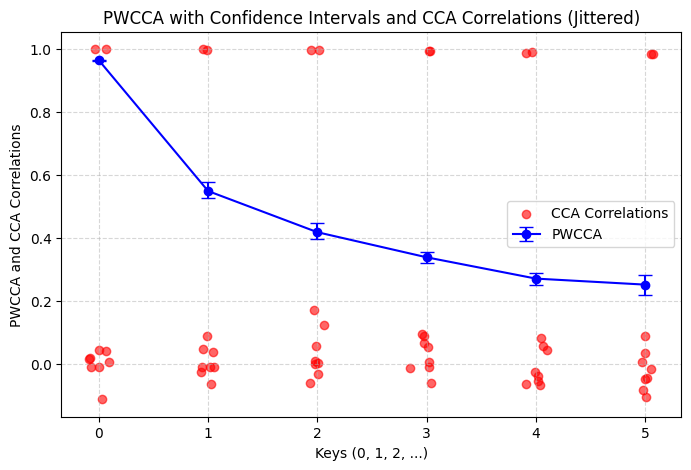

In [13]:
# Data dictionary
data = results

# Extract keys, pwcca values, and confidence intervals
keys = list(data.keys())
pwcca_vals = [data[k]['pwcca'] for k in keys]
ci_lower = [data[k]['ci_lower'] for k in keys]
ci_upper = [data[k]['ci_upper'] for k in keys]
ci_error = [np.array(ci_upper) - np.array(pwcca_vals), np.array(pwcca_vals) - np.array(ci_lower)]

# Plot PWCCA with confidence intervals
plt.figure(figsize=(8, 5))
plt.errorbar(keys, pwcca_vals, yerr=ci_error, fmt='o-', label='PWCCA', capsize=5, color='b')

# Plot CCA correlation values as scatter points for each key with jitter
np.random.seed(44)  # For reproducibility
jitter_strength = 0.05  # Adjust this for more or less spread

for k in keys:
    x_vals = np.full(len(data[k]['cca_corrs']), float(k))  # Convert k to float
    x_vals += np.random.normal(scale=jitter_strength, size=len(x_vals))  # Add jitter
    y_vals = data[k]['cca_corrs']
    plt.scatter(x_vals, y_vals, color='r', alpha=0.6, label='CCA Correlations' if k == 0 else "")

# Labels and Title
plt.xlabel("Keys (0, 1, 2, ...)")
plt.ylabel("PWCCA and CCA Correlations")
plt.title("PWCCA with Confidence Intervals and CCA Correlations (Jittered)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()


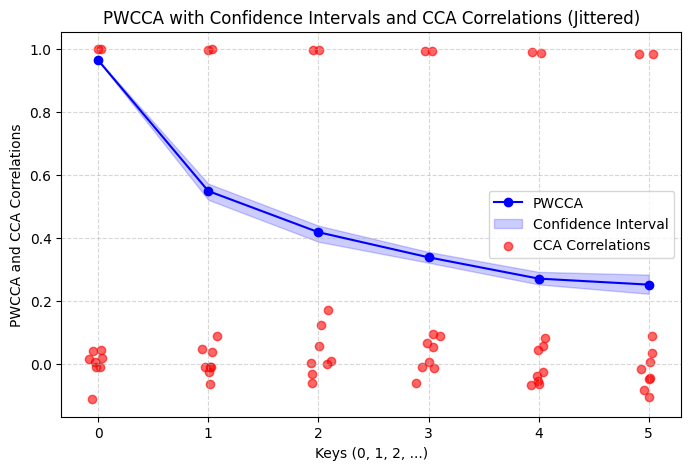

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Data dictionary
data = results

# Extract keys, pwcca values, and confidence intervals
keys = list(data.keys())
pwcca_vals = [data[k]['pwcca'] for k in keys]
ci_lower = [data[k]['ci_lower'] for k in keys]
ci_upper = [data[k]['ci_upper'] for k in keys]

# Create plot
plt.figure(figsize=(8, 5))

# Plot PWCCA as a line
plt.plot(keys, pwcca_vals, 'o-', label='PWCCA', color='b')

# Shade confidence interval area
plt.fill_between(keys, ci_lower, ci_upper, color='b', alpha=0.2, label='Confidence Interval')

# Plot CCA correlation values as scatter points with jitter
np.random.seed(4)  # For reproducibility
jitter_strength = 0.05  # Adjust for more or less spread

for k in keys:
    x_vals = np.full(len(data[k]['cca_corrs']), float(k))  # Convert key to float
    x_vals += np.random.normal(scale=jitter_strength, size=len(x_vals))  # Add jitter
    y_vals = data[k]['cca_corrs']
    plt.scatter(x_vals, y_vals, color='r', alpha=0.6, label='CCA Correlations' if k == 0 else "")

# Labels and Title
plt.xlabel("Keys (0, 1, 2, ...)")
plt.ylabel("PWCCA and CCA Correlations")
plt.title("PWCCA with Confidence Intervals and CCA Correlations (Jittered)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()


### PWCCA

In [1]:
import numpy as np
from sklearn.cross_decomposition import CCA
from scipy.linalg import orth

# 1. Create small datasets (9 samples, 6 and 4 features)
np.random.seed(42)
X = np.random.rand(9, 6)  # (9x6)
Y = np.random.rand(9, 4)  # (9x4)

print(f"X shape: {X.shape}")  # (9,6)
print(f"Y shape: {Y.shape}")  # (9,4)

# 2. Perform Canonical Correlation Analysis with 3 components
cca = CCA(n_components=3)
X_transformed, Y_transformed = cca.fit_transform(X, Y)  # Both are (9x3)

X shape: (9, 6)
Y shape: (9, 4)


In [6]:
cca.x_weights_ # cca.x_weights_.shape

array([[ 0.78239981,  0.3617984 , -0.03719098],
       [ 0.25400087,  0.08422507,  0.52617739],
       [ 0.24070293, -0.13292934,  0.62374777],
       [-0.04308133,  0.74414159, -0.18181028],
       [ 0.38595875, -0.5281248 , -0.25571369],
       [-0.33849081,  0.10805244,  0.48399219]])

In [ ]:


print(f"X_transformed shape: {X_transformed.shape}")  # (9,3)
print(f"Y_transformed shape: {Y_transformed.shape}")  # (9,3)

# 3. Compute canonical correlations
cca_corrs = np.corrcoef(X_transformed.T, Y_transformed.T)[:3, 3:].diagonal()
print(f"Canonical Correlations (rho_i): {cca_corrs}")  # Shape (3,)

# 4. Compute projection weights (PWCCA)
def compute_weighted_sum(proj_data, cca_corrs):
    print("proj_data.T shape:", proj_data.T.shape)
    basis = orth(proj_data.T)  # Orthonormal basis (3x3)
    print("basis shape:", basis.shape)
    print("basis:")
    print(basis)
    #project:
    proj_data = basis @ proj_data.T # 
    print("proj_data shape:", proj_data.shape)
    weights = np.linalg.norm(proj_data, axis=1)  # Shape (3,)
    print("weights shape:", weights.shape)
    # weights = np.linalg.norm(basis.T @ proj_data, axis=1)  # Shape (3,)
    
    weights /= np.sum(weights)  # Normalize
    return np.sum(weights * cca_corrs)  # Weighted sum

# Compute for both views
score_x = compute_weighted_sum(X_transformed, cca_corrs)
score_y = compute_weighted_sum(Y_transformed, cca_corrs)

# Compute final PWCCA score
pwcca_score = (score_x + score_y) / 2
print(f"PWCCA Score: {pwcca_score}")


X shape: (9, 6)
Y shape: (9, 4)
X_transformed shape: (9, 3)
Y_transformed shape: (9, 3)
Canonical Correlations (rho_i): [0.99999909 0.94123353 0.44512655]
proj_data.T shape: (3, 9)
basis shape: (3, 3)
basis:
[[-1.00000000e+00 -3.08366244e-31  4.20962682e-16]
 [-4.20962682e-16  7.32526319e-16 -1.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  7.32526319e-16]]
proj_data shape: (3, 9)
weights shape: (3,)
proj_data.T shape: (3, 9)
basis shape: (3, 3)
basis:
[[-8.00700848e-17 -1.00000000e+00  8.00700848e-17]
 [-1.00000000e+00  8.00700848e-17 -3.20560924e-33]
 [ 1.11022302e-16  8.00700848e-17  1.00000000e+00]]
proj_data shape: (3, 9)
weights shape: (3,)
PWCCA Score: 0.8233484212074345


X shape: (9, 6)
Y shape: (9, 4)
X_transformed shape: (9, 3)
Y_transformed shape: (9, 3)
Canonical Correlations (rho_i): [0.99999909 0.94123353 0.44512655]
basis shape: (3, 3)
proj_data shape: (3, 9)
weights shape: (3,)
basis shape: (3, 3)
proj_data shape: (3, 9)
weights shape: (3,)
PWCCA Score: 0.8233484212074345

In [16]:
import numpy as np
from scipy.linalg import orth

X = np.random.randn(900, 10)  # 900 samples, 10-dimensional
Q = orth(X)  # Orthonormal basis

print(Q.shape)  # (900, 10) if full rank
print(Q.T @ X)  # Should be (10, 10), like in your case


(900, 10)
[[-1.69024372e+01 -1.30431212e+00  1.63819967e+01 -3.22807310e-01
   8.60324673e+00 -1.62492306e+00  4.11879142e-01 -1.53851306e+00
   6.93517052e+00 -1.98329611e+01]
 [ 8.73336542e+00  4.06976134e+00 -7.31942284e+00  3.25609390e+00
  -3.85283714e+00 -6.21185261e+00 -4.73438336e+00 -1.87290491e+01
   2.08330443e+01 -6.33232575e+00]
 [-6.25335519e+00 -1.46335691e+00  6.00760044e+00  2.25567143e+01
   1.53105924e+00 -1.87683168e+00  1.27275077e+01 -1.10808097e+01
  -2.48090435e+00  1.10950197e+01]
 [ 2.80860966e-01 -1.52143676e+00  9.95257461e+00  2.98467788e+00
  -6.49220246e+00  1.41882462e+01 -2.00586984e+01 -1.13096901e+01
  -7.95998550e+00  1.73158328e+00]
 [-1.35615219e+00 -2.09904441e+00  2.29480943e+00 -1.86338000e+01
  -2.44828057e+00  2.35178720e+00  1.38333718e+01 -1.75188825e+01
  -7.25026796e+00  1.34891612e+00]
 [-5.41628348e+00  1.43496056e+01  2.48250203e+00 -3.40062213e+00
  -3.83812845e-01  1.80950442e+01  5.32765295e+00  4.25551425e+00
   1.38974470e+01  8.76